In [1]:
import pandas as pd
df = pd.read_csv("data.csv")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,Normalizer
cat_col = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']

encoded_df = df.copy()

for column in cat_col:
    
    label_encoder = LabelEncoder()
    
    encoded_df[column] = label_encoder.fit_transform(encoded_df[column])
    mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))
    print(f"{column} for {mapping}")
mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

int_col = [i for i in df.columns.values if i not in cat_col and i!='Attrition']
# 标准化特征
scaler1 = StandardScaler()
scaler2 = Normalizer()
encoded_df[int_col] = scaler1.fit_transform(encoded_df[int_col] )
encoded_df[int_col] = scaler2.fit_transform(encoded_df[int_col] )

BusinessTravel for {0: 'Non-Travel', 1: 'Travel_Frequently', 2: 'Travel_Rarely'}
Department for {0: 'Human_Resources', 1: 'Research_Development', 2: 'Sales'}
Education for {0: 'Bachelor', 1: 'Below_College', 2: 'College', 3: 'Doctor', 4: 'Master'}
EducationField for {0: 'Human_Resources', 1: 'Life_Sciences', 2: 'Marketing', 3: 'Medical', 4: 'Other', 5: 'Technical_Degree'}
EnvironmentSatisfaction for {0: 'High', 1: 'Low', 2: 'Medium', 3: 'Very_High'}
Gender for {0: 'Female', 1: 'Male'}
JobInvolvement for {0: 'High', 1: 'Low', 2: 'Medium', 3: 'Very_High'}
JobRole for {0: 'Healthcare_Representative', 1: 'Human_Resources', 2: 'Laboratory_Technician', 3: 'Manager', 4: 'Manufacturing_Director', 5: 'Research_Director', 6: 'Research_Scientist', 7: 'Sales_Executive', 8: 'Sales_Representative'}
JobSatisfaction for {0: 'High', 1: 'Low', 2: 'Medium', 3: 'Very_High'}
MaritalStatus for {0: 'Divorced', 1: 'Married', 2: 'Single'}
OverTime for {0: 'No', 1: 'Yes'}
PerformanceRating for {0: 'Excellent', 

In [2]:
import random
import numpy as np
import os
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
def set_seed(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ["PYTHONHASHSEED"] = str(seed_value)
    

SEED = 42
set_seed(SEED)
x = encoded_df.drop(columns = ['Attrition'])
y = encoded_df['Attrition']
#划分训练集
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=,trian_size=,random_state,shuffle,stratify)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=SEED)
smote = SMOTE(sampling_strategy='minority', random_state=42)  # 您可以选择其他过采样策略
x_train, y_train = smote.fit_resample(x_train, y_train)

x_train = x_train.reset_index(drop= True)
y_train = y_train.reset_index(drop= True)
x_test = x_test.reset_index(drop= True)
y_test = y_test.reset_index(drop= True)
x_train['new_getin'] = x_train['YearsInCurrentRole'] - x_train['YearsWithCurrManager']
x_test['new_getin'] = x_test['YearsInCurrentRole'] - x_test['YearsWithCurrManager']
train = pd.concat([x_train,y_train],axis=1)
test = pd.concat([x_test,y_test],axis=1)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_auc_score,
    f1_score,
    recall_score,
    precision_score,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
train_metrics = {}
test_metrics = {}
# 定义模型

models = {
    "Naive Bayes": GaussianNB(),
    "SVM" : SVC(C=1.5,class_weight="balanced")
}

# 使用 StratifiedKFold 进行交叉验证
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    fold = 0
    print(f"_______________model : {name}________________")
    print(f"total fold : 10 ")
    metrics = {
        "accuracy": [],
        "auc": [],
        "f1_score": [],
        "recall": [],
        "precision": [],
        'precision-True0':[]
    }
    for train_idx, valid_idx in kf.split(train,y_train):
        fold += 1
        X_train_fold, y_train_fold = x_train.iloc[train_idx], y_train.iloc[train_idx]
        X_valid_fold, y_valid_fold = x_train.iloc[valid_idx], y_train.iloc[valid_idx]
        
        if name in ['XGB',"LGB"]:
            model.fit(X_train_fold, y_train_fold,eval_set=[(X_valid_fold, y_valid_fold)],verbose = 0)
        else :
            model.fit(X_train_fold, y_train_fold)

        y_pred_fold = model.predict(X_valid_fold)
        
        accuracy = accuracy_score(y_valid_fold, y_pred_fold)
        auc = roc_auc_score(y_valid_fold, y_pred_fold)
        f1 = f1_score(y_valid_fold, y_pred_fold)
        recall = recall_score(y_valid_fold, y_pred_fold)
        precision = precision_score(y_valid_fold, y_pred_fold)

        metrics["accuracy"].append(accuracy)
        metrics["auc"].append(auc)
        metrics["f1_score"].append(f1)
        metrics["recall"].append(recall)
        metrics["precision"].append(precision)
        

        # print(f"{name} - Fold {fold} Metrics:")
        # print(f"  Accuracy: {accuracy}")
        # print(f"  AUC: {auc}")
        # print(f"  F1-score: {f1}")
        # print(f"  Recall: {recall}")
        # print(f"  Precision: {precision}")
        cm = confusion_matrix(y_valid_fold, y_pred_fold)
        # 使用 Pandas 数据帧格式化混淆矩阵并添加索引和标签
        cm_df = pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Predicted 0', 'Predicted 1'])
        metrics["precision-True0"].append(cm_df.loc['True 0','Predicted 0']/cm_df.loc['True 0',:].sum())

    # 计算平均指标并将其添加到 train_metrics 字典中
    train_metrics[name] = {
        "accuracy": np.mean(metrics['accuracy']),
        "auc": np.mean(metrics['auc']),
        "f1_score": np.mean(metrics['f1_score']),
        "recall": np.mean(metrics['recall']),
        "precision": np.mean(metrics['precision']),
        'precision-True0':np.mean(metrics["precision-True0"])
    }
    tmp = np.mean(metrics["precision-True0"])
    print(f"{name} Average Metrics:")
    print(f"  Accuracy: {np.mean(metrics['accuracy'])}")
    print(f"  AUC: {np.mean(metrics['auc'])}")
    print(f"  F1-score: {np.mean(metrics['f1_score'])}")
    print(f"  Recall: {np.mean(metrics['recall'])}")
    print(f"  Precision: {np.mean(metrics['precision'])}")
    print(f"  precision-True0: {tmp}")
    print("___________________________________")
    print(" ")

# 在测试集上评估效果
for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
     # 使用 Pandas 数据帧格式化混淆矩阵并添加索引和标签
    cm_df = pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Predicted 0', 'Predicted 1'])
    
    print(f"{name} Confusion Matrix:\n{cm_df}")

    # 在测试集上计算AUC、F1-score、Recall、Precision
    test_accuracy = accuracy_score(y_test, y_pred)
    test_auc = roc_auc_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)

    test_metrics[name] = {
        "accuracy": test_accuracy,
        "auc": test_auc,
        "f1_score": test_f1,
        "recall": test_recall,
        "precision": test_precision,
        'precision-True0':cm_df.loc['True 0','Predicted 0']/cm_df.loc['True 0',:].sum()
    }
    print(f"{name} Test Metrics:")
    print(f"  Accuracy: {test_accuracy}")
    print(f"  AUC: {test_auc}")
    print(f"  F1-score: {test_f1}")
    print(f"  Recall: {test_recall}")
    print(f"  Precision: {test_precision}")
    print(f"  Precision - True 0: {cm_df.loc['True 0','Predicted 0']/cm_df.loc['True 0',:].sum()}")
    print("___________________________")
    print(" ")
train_metrics_df = pd.DataFrame(train_metrics).transpose()
test_metrics_df = pd.DataFrame(test_metrics).transpose()
print("Train Metrics Dataframe:")
print(train_metrics_df)

print("Test Metrics Dataframe:")
print(test_metrics_df)

In [3]:
from torch.utils.data import Dataset, DataLoader
import torch
# 创建一个数据集
class MyDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.tensor(features.to_numpy(), dtype=torch.float32)
        self.targets = torch.tensor(targets.to_numpy(), dtype=torch.float32)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]
    
# x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=SEED)

# 创建DataLoader
train_data = MyDataset(x_train, y_train)
# val_data = MyDataset(x_val, y_val)
test_data = MyDataset(x_test, y_test)


train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
# val_dataloader = DataLoader(val_data, batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)


In [4]:
import torch
import torch.nn as nn

class BinaryClassifier(nn.Module):
    def __init__(self, input_features=10, hidden_units=32):
        super(BinaryClassifier, self).__init__()
    
        self.layer1 = nn.Sequential(nn.Linear(input_features, hidden_units), nn.BatchNorm1d(hidden_units), nn.ReLU())

        self.layer2 = nn.Sequential(nn.Linear(hidden_units, hidden_units*2), nn.BatchNorm1d(hidden_units*2), nn.ReLU())

        self.layer3 = nn.Sequential(nn.Linear(hidden_units*2, hidden_units*3), nn.BatchNorm1d(hidden_units*3), nn.ReLU())

        # 输出层
        self.output = nn.Linear(hidden_units*3, 1)

        # Sigmoid激活函数用于二分类
        self.output_act = nn.Sigmoid()





    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x =  self.output(x)
        x = self.output_act(x)
        
        return x
    
    def reset_parameters(self):
        for name, module in self.named_modules():
            if isinstance(module, nn.Linear):
                print(f'reset the {name}')
                nn.init.xavier_uniform_(module.weight.data)
                if module.bias is not None:
                    module.bias.data.zero_()
            elif isinstance(module, nn.LayerNorm):
                print(f'reset the {name}')
                module.bias.data.zero_()
                module.weight.data.fill_(1.0)


In [9]:
def train(model, device, loss_fn,train_loader, optimizer, epoch):
        model.train()
        train_loss, correct = 0, 0
        train_pbar = enumerate(train_dataloader)
        true_labels = []
        predicted_labels = []
        print(f'Epoch {epoch}')
        
        for step, batch in train_pbar:
            batch = tuple(t.to(device) for t in batch)
            data, labels = batch
            labels = labels.reshape(-1,1)
            # Forward pass
            optimizer.zero_grad()
            outputs = model(data)
#             print(f'output siza is {outputs.size()}')
            outputs = outputs.float()
            loss = loss_fn(outputs, labels)
            train_loss +=loss.item()
            threshold = 0.5
            pred = (outputs > threshold).float()  # get the predictions
            # print(pred)
            correct += pred.eq(labels.view_as(pred)).sum().item()
            
            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(pred.squeeze().cpu().numpy())

            
            # Backward pass
            loss.backward()
            optimizer.step()
            
        train_loss /= len(train_loader.dataset)
    
        macro_f1 = f1_score(true_labels, predicted_labels, average='macro')
        macro_precision = precision_score(true_labels, predicted_labels, average='macro')
        macro_recall = recall_score(true_labels, predicted_labels, average='macro')
        micro_f1 = f1_score(true_labels, predicted_labels, average='micro')
    
    
        print('Train set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%), Macro_f1: {:.4f}, Micro_f1: {:.4f}, macro_precision: {:.4f}, macro_recall: {:.4f}\n'.format(
            train_loss, correct, len(train_loader.dataset),
            100. * correct / len(train_loader.dataset),macro_f1,micro_f1,macro_precision,macro_recall))
        
        return train_loss, 100. * correct / len(train_loader.dataset), macro_f1, micro_f1, macro_precision, macro_recall

def test(model, device, test_loader , loss_fn,epoch):
    model.eval()
    test_loss = 0
    correct = 0
    val_pbar = enumerate(test_loader)
    true_labels = []
    predicted_labels = []
    with torch.no_grad():
        for step, batch in val_pbar:
            batch = tuple(t.to(device) for t in batch)
            data, labels = batch
            labels = labels.reshape(-1,1)
            outputs = model(data)
            outputs = outputs.float()
            test_loss += loss_fn(outputs, labels).item()  # sum up batch loss
            threshold = 0.5
            pred = (outputs > threshold).float()  # get the predictions
            correct += pred.eq(labels.view_as(pred)).sum().item()
            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(pred.squeeze().cpu().numpy())
            
    test_loss /= len(test_loader.dataset)
    
    macro_f1 = f1_score(true_labels, predicted_labels, average='macro')
    macro_precision = precision_score(true_labels, predicted_labels, average='macro')
    macro_recall = recall_score(true_labels, predicted_labels, average='macro')
    micro_f1 = f1_score(true_labels, predicted_labels, average='micro')
    
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%), Macro_f1: {:.4f}, Micro_f1: {:.4f}, macro_precision: {:.4f}, macro_recall: {:.4f}\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset),macro_f1,micro_f1,macro_precision,macro_recall))
    return test_loss, 100. * correct / len(test_loader.dataset), macro_f1, micro_f1, macro_precision, macro_recall

In [13]:
from transformers import AdamW
from sklearn.metrics import f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
col = x_train.shape[-1]
model = BinaryClassifier(col,16)
model.reset_parameters()
model.to(device)
lr = 1e-3
weight_decay = 0.01
loss_fn = nn.BCELoss()
optimizer = AdamW(model.parameters(), betas=(0.9, 0.999), weight_decay=weight_decay,lr=lr,eps=1e-8)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, cooldown=3,factor=0.2,min_lr=5e-9)

train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []
train_macro_f1, train_micro_f1, train_macro_precision, train_macro_recall = [], [], [], []
test_macro_f1, test_micro_f1, test_macro_precision, test_macro_recall = [], [], [], []
learning_rates = []

for epoch in range(1, 200):
    train_metrics = train(model, optimizer=optimizer,loss_fn=loss_fn, train_loader = train_dataloader,epoch=epoch,device=device)
    test_metrics = test(model,device=device,test_loader=test_dataloader,loss_fn = loss_fn,epoch=epoch)
    train_losses.append(train_metrics[0])
    train_accuracies.append(train_metrics[1])
    train_macro_f1.append(train_metrics[2])
    train_micro_f1.append(train_metrics[3])
    train_macro_precision.append(train_metrics[4])
    train_macro_recall.append(train_metrics[5])
    
    test_losses.append(test_metrics[0])
    test_accuracies.append(test_metrics[1])
    test_macro_f1.append(test_metrics[2])
    test_micro_f1.append(test_metrics[3])
    test_macro_precision.append(test_metrics[4])
    test_macro_recall.append(test_metrics[5])
    learning_rates.append(optimizer.param_groups[0]['lr'])
    
    scheduler.step(test_metrics[0])

reset the layer1.0
reset the layer2.0
reset the layer3.0
reset the output
Epoch 1
Train set: Average loss: 0.0214, Accuracy: 1024/1706 (60%), Macro_f1: 0.5982, Micro_f1: 0.6002, macro_precision: 0.6023, macro_recall: 0.6002

Test set: Average loss: 0.0210, Accuracy: 259/441 (59%), Macro_f1: 0.4944, Micro_f1: 0.5873, macro_precision: 0.5396, macro_recall: 0.5816

Epoch 2
Train set: Average loss: 0.0186, Accuracy: 1172/1706 (69%), Macro_f1: 0.6866, Micro_f1: 0.6870, macro_precision: 0.6879, macro_recall: 0.6870

Test set: Average loss: 0.0212, Accuracy: 264/441 (60%), Macro_f1: 0.4866, Micro_f1: 0.5986, macro_precision: 0.5234, macro_recall: 0.5469

Epoch 3
Train set: Average loss: 0.0176, Accuracy: 1216/1706 (71%), Macro_f1: 0.7119, Micro_f1: 0.7128, macro_precision: 0.7155, macro_recall: 0.7128

Test set: Average loss: 0.0213, Accuracy: 264/441 (60%), Macro_f1: 0.4921, Micro_f1: 0.5986, macro_precision: 0.5300, macro_recall: 0.5607

Epoch 4
Train set: Average loss: 0.0167, Accuracy: 12

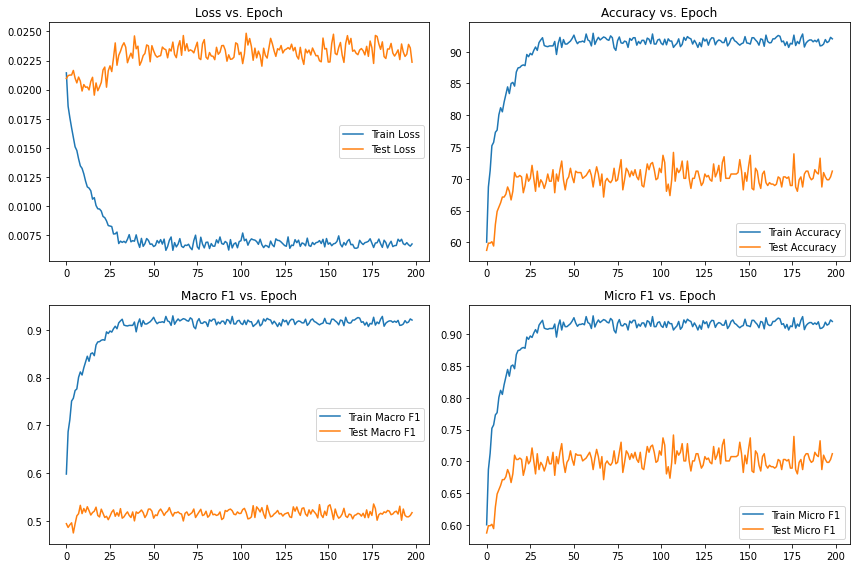

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.title('Loss vs. Epoch')

plt.subplot(2, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.legend()
plt.title('Accuracy vs. Epoch')

plt.subplot(2, 2, 3)
plt.plot(train_macro_f1, label='Train Macro F1')
plt.plot(test_macro_f1, label='Test Macro F1')
plt.legend()
plt.title('Macro F1 vs. Epoch')

plt.subplot(2, 2, 4)
plt.plot(train_micro_f1, label='Train Micro F1')
plt.plot(test_micro_f1, label='Test Micro F1')
plt.legend()
plt.title('Micro F1 vs. Epoch')

plt.tight_layout()
plt.show()


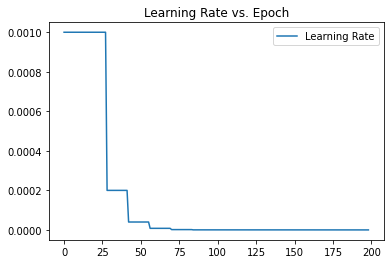

In [16]:
plt.figure(figsize=(6, 4))
plt.plot(learning_rates, label='Learning Rate')
plt.legend()
plt.title('Learning Rate vs. Epoch')
plt.show()